In [1]:
!pip install mahotas

In [2]:
from glob import glob
import mahotas as mh

In [85]:
# 네이버
images_n = glob('./total_img/*.png')
images_n.sort()
len(images_n), images_n[:3]

(26062,
 ['./total_img/11me, 고지애&영재영_(0). 프롤로그.png',
  './total_img/11me, 고지애&영재영_(1). 미친 놈 아녀?.png',
  './total_img/11me, 고지애&영재영_(10). 요즘 이상해.png'])

In [34]:
# 네이버
images_n[0].split('/')[2].split(',')[0]

'11me'

In [86]:
# 다음
images_d = glob('./total_img_d/*.png')
images_d.sort()
len(images_d), images_d[:3]

(10212,
 ['./total_img_d/4학년_10화.png',
  './total_img_d/4학년_11화.png',
  './total_img_d/4학년_12화.png'])

In [38]:
# 다음
images_d[60].split('/')[2].split('_')[0]

'NR 뉴월드'

In [ ]:
# im = mh.imread(images[0])
# im = mh.colors.rgb2gray(im, dtype=np.uint8)
# im.shape

In [ ]:
# mh.features.haralick(im)

In [4]:
# %%time
# # 네이버
# features_n = []
# labels_n = []

# for im in images_n:
#     labels_n.append(im.split('/')[2].split(',')[0])  # 네이버
#     im_n = mh.imread(im)
#     try: 
#         im_n = mh.colors.rgb2gray(im_n, dtype=np.uint8)
#         features_n.append(mh.features_n.haralick(im_n).ravel())
#     except:
#         features_n.append(features_n[len(features_n) - 1])

fit time : 155.5990490913391


In [5]:
# features_n = np.array(features_n)
# labels_n = np.array(labels_n)

In [6]:
# features_n.shape

(10212, 52)

In [7]:
# im_n.shape

(150, 250)

In [45]:
%%time
# 다음
features_d = []
labels_d = []

for im in images_d:
    labels_d.append(im.split('/')[2].split('_')[0])  # 다음
    im = mh.imread(im)
    try: 
        im = mh.colors.rgb2gray(im, dtype=np.uint8)
        features_d.append(mh.features.haralick(im).ravel())
    except:
        features_d.append(features_d[len(features_d) - 1])

CPU times: user 19min 55s, sys: 21.6 s, total: 20min 16s
Wall time: 2min 38s


In [46]:
features_d = np.array(features_d)
labels_d = np.array(labels_d)

In [47]:
features_d.shape

(10212, 52)

In [48]:
im.shape

(150, 250)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [50]:
clf = Pipeline([('preprocssing', StandardScaler()),
               ('classifier', LogisticRegression())])
clf

Pipeline(memory=None,
         steps=[('preprocssing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, features_d, labels_d)
scores

array([0.35438081, 0.35731767, 0.33986288, 0.33153771, 0.33545544])

In [52]:
print(f'ACCURACY : {scores.mean():.2%}')

ACCURACY : 34.37%


In [53]:
from scipy.spatial import distance

sc = StandardScaler()
features = sc.fit_transform(features_d)

dists = distance.squareform(distance.pdist(features_d))

In [54]:
dists

array([[    0.        , 37891.98774808, 18684.41849336, ...,
        10428.27528133, 14753.15324361, 19643.77801429],
       [37891.98774808,     0.        , 56514.55073178, ...,
        48286.64855459, 23215.37578432, 57528.08526544],
       [18684.41849336, 56514.55073178,     0.        , ...,
         8329.5659445 , 33414.56442833,  1775.6985811 ],
       ...,
       [10428.27528133, 48286.64855459,  8329.5659445 , ...,
            0.        , 25168.48542699,  9252.10732128],
       [14753.15324361, 23215.37578432, 33414.56442833, ...,
        25168.48542699,     0.        , 34381.10950132],
       [19643.77801429, 57528.08526544,  1775.6985811 , ...,
         9252.10732128, 34381.10950132,     0.        ]])

In [55]:
def selectImage(n, m, dists, images):
    image_position = dists[n].argsort()[m]
    image = mh.imread(images[image_position])
    
    return image

In [77]:
def plotImages(n):
    fig, ax = plt.subplots(1, 6, figsize=(15, 5))
    
    for i in range(6):
        ax[i].imshow(selectImage(n, i, dists, images))
        plt.title(f'{n}번째 이미지와 비슷한 이미지', loc='center')
        ax[i].set_xticks([])
        ax[i].set_yticks([])    
        
    plt.show()

In [80]:
def indexImage(n):
    plt.subplots(dpi=50)
    plt.imshow(selectImage(n, 1, dists, images))
    plt.grid(False)
    plt.title(f'{n}번째 이미지', loc='center')
    plt.show()

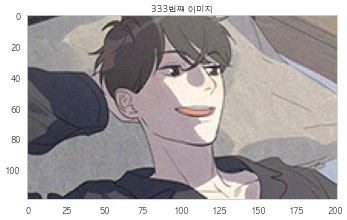

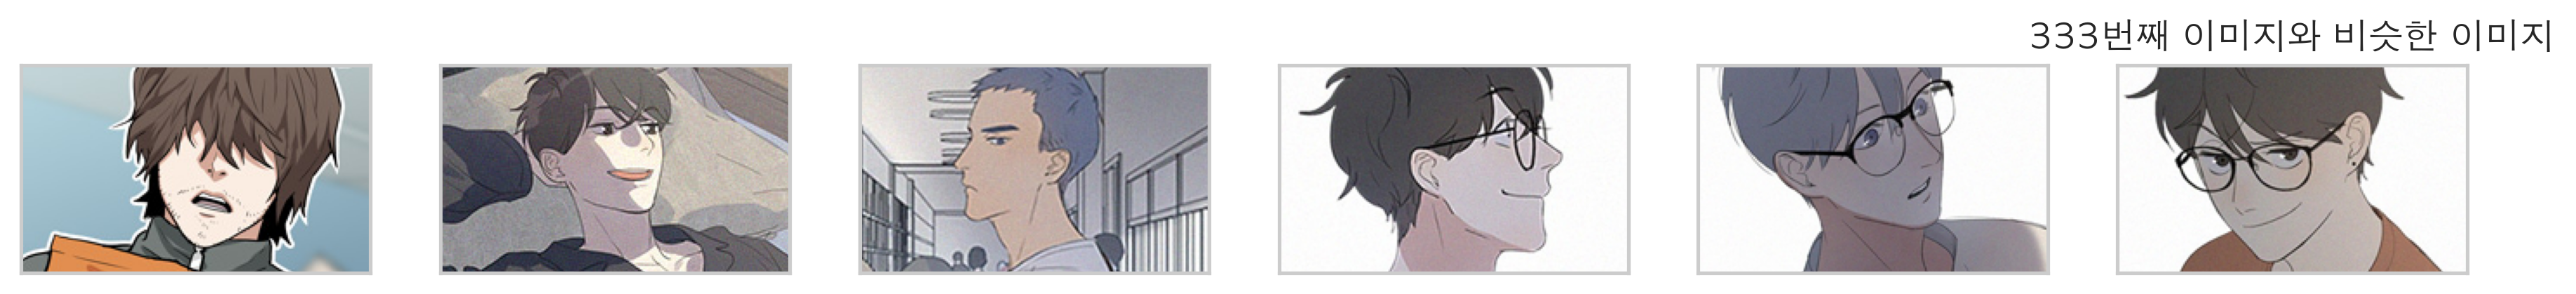

In [81]:
indexImage(333)
plotImages(333)

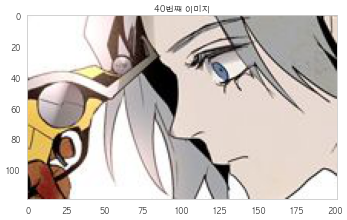

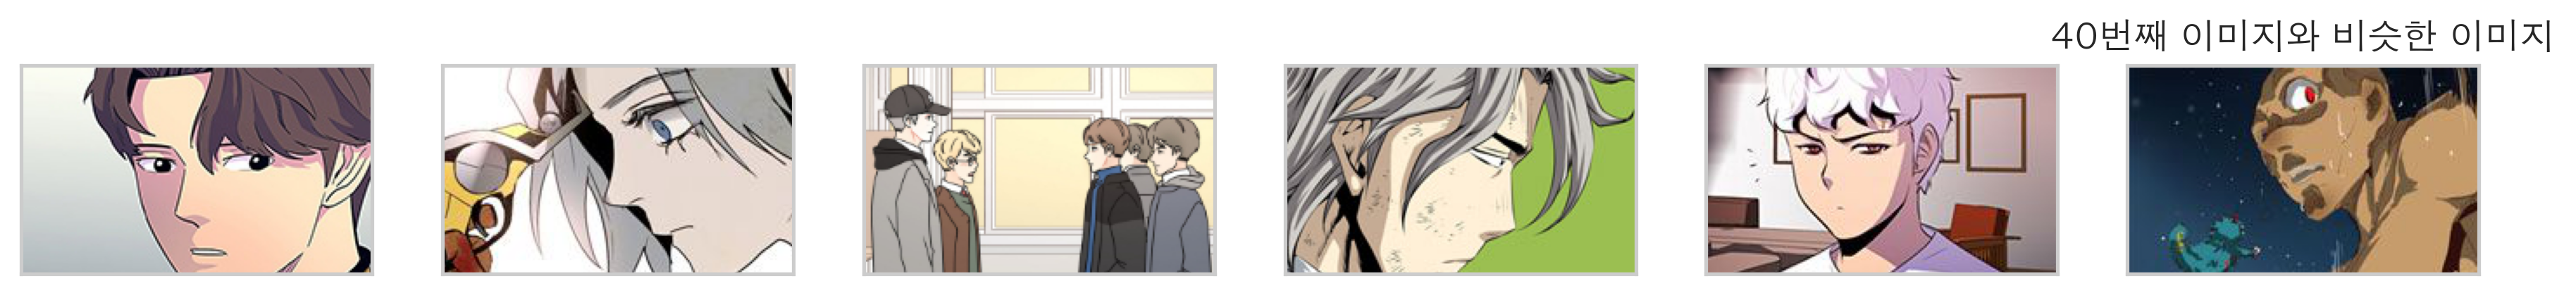

In [82]:
indexImage(40)
plotImages(40)

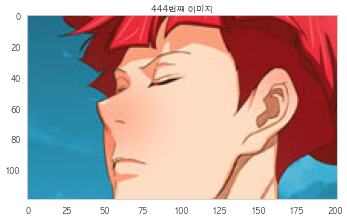

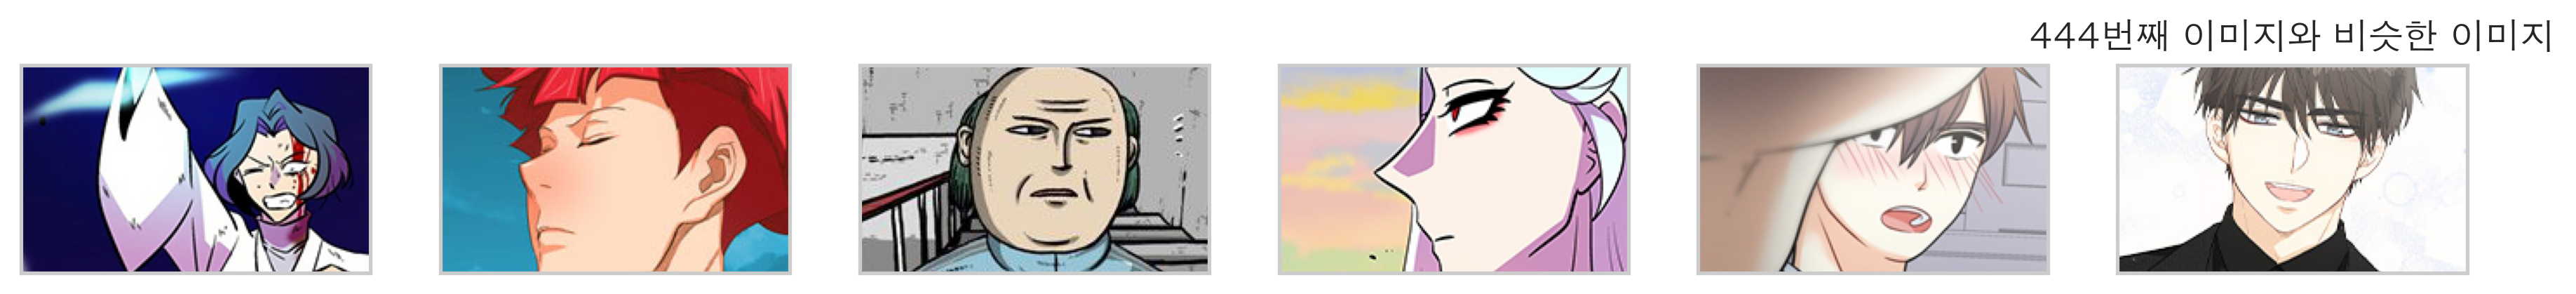

In [84]:
indexImage(444)
plotImages(444)

### - 비교대상?이 2번째 이미지로 함께나옴
### - accuracy가 34% 
